# Part 3

# Question 5: Using train dataset splitted using my unique (student ID = 5) into train and test dataset 

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Define a function to load dataset

def load_h5_dataset(file_path):
    with h5py.File(file_path, 'r') as dataset:
        data = {key: np.array(dataset[key]) for key in dataset.keys()}
    return data

In [6]:
# load the dataset
train_data = load_h5_dataset('train_catvnoncat.h5')

test_data = load_h5_dataset('test_catvnoncat.h5')

# check what the dataset looks like
train_data

{'list_classes': array([b'non-cat', b'cat'], dtype='|S7'),
 'train_set_x': array([[[[ 17,  31,  56],
          [ 22,  33,  59],
          [ 25,  35,  62],
          ...,
          [  1,  28,  57],
          [  1,  26,  56],
          [  1,  22,  51]],
 
         [[ 25,  36,  62],
          [ 28,  38,  64],
          [ 30,  40,  67],
          ...,
          [  1,  27,  56],
          [  1,  25,  55],
          [  2,  21,  51]],
 
         [[ 32,  40,  67],
          [ 34,  42,  69],
          [ 35,  42,  70],
          ...,
          [  1,  25,  55],
          [  0,  24,  54],
          [  1,  21,  51]],
 
         ...,
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [

In [20]:
# Define a preprocessing function

def preprocessing(train_data, test_data):
    
    # Reshape/flatten images if they are 3D, normalize pixel values
    train_X = train_data["train_set_x"].reshape(train_data["train_set_x"].shape[0], -1) / 255.0
    
    X_train = train_X[:165]   # 160 + 5 (last digit of my student ID = 5)
    X_test = train_X[165:]
    #  X_test = test_data["test_set_x"].reshape(test_data["test_set_x"].shape[0], -1) / 255.0

    # flatten the y (response)-variables
    train_y = train_data["train_set_y"].flatten()

    y_train = train_y[:165]
    y_test = train_y[165:]
    
    #  y_test = test_data["test_set_y"].flatten()
    
    return X_train, X_test, y_train, y_test

In [21]:
# Preprocess data
X_train, X_test, y_train, y_test = preprocessing(train_data, test_data)

In [25]:
# Classification and error reporting
def train_and_evaluate(X_train, y_train, X_test, y_test):

    # Train logistic regression model
    model = LogisticRegression(max_iter= 2000)
    model.fit(X_train, y_train)

    # Test set prediction
    y_pred = model.predict(X_test)

    # wrong predictions
    wrong_indices = np.where(y_pred != y_test)[0]   # select the first of every other things but the predicted y_test 

    # Record and print the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    return wrong_indices, y_pred

In [26]:
# define a function to visualize only incorrect predictions
def display_incorrect_images(wrong_indices, test_images, y_test, y_pred, num_images=4):

    plt.figure(figsize=(10, 10))
    
    # iterate through and only plot the wrong predicted images    
    for i, idx in enumerate(wrong_indices[:num_images]):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(test_images[idx])
        plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.show()

Accuracy: 0.50


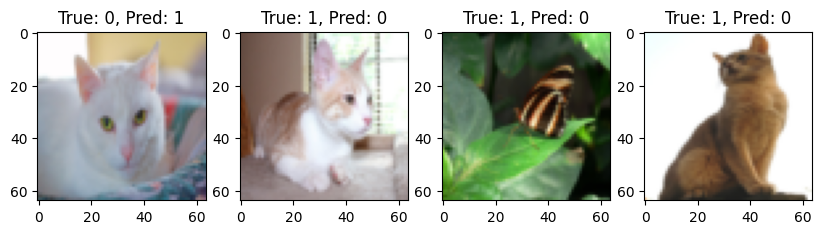

In [27]:
# Train and evaluate
wrong_indices, y_pred = train_and_evaluate(X_train, y_train, X_test, y_test)

# Display incorrect predictions
test_images = test_data["test_set_x"]
display_incorrect_images(wrong_indices, test_images, y_test, y_pred)